In [3]:
%%pyspark
blob_account_name = "pandemicdatalake"
blob_container_name = "public"
blob_relative_path = "curated/covid-19/bing_covid-19_data/latest/bing_covid-19_data.parquet"
blob_sas_token = r""
# Allow SPARK to read from Blob remotely
wasbs_path = 'wasbs://%s@%s.blob.core.windows.net/%s' % (blob_container_name, blob_account_name, blob_relative_path)

spark.conf.set(
    'fs.azure.sas.%s.%s.blob.core.windows.net' % (blob_container_name, blob_account_name),
    blob_sas_token)
df = spark.read.parquet(wasbs_path)
display(df.limit(10))

StatementMeta(SampleSpark, 1, 1, Finished, Available)

SynapseWidget(Synapse.DataFrame, e26e4a18-10d4-4aab-a6c5-05a5ce5ac97d)

In [4]:
df.printSchema()

StatementMeta(SampleSpark, 1, 2, Finished, Available)

root
 |-- id: integer (nullable = true)
 |-- updated: date (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- confirmed_change: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- deaths_change: short (nullable = true)
 |-- recovered: integer (nullable = true)
 |-- recovered_change: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- iso2: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- country_region: string (nullable = true)
 |-- admin_region_1: string (nullable = true)
 |-- iso_subdivision: string (nullable = true)
 |-- admin_region_2: string (nullable = true)
 |-- load_time: timestamp (nullable = true)

In [6]:
from pyspark.sql import functions as F
df_group = df.groupBy("country_region").agg(F.avg('confirmed').alias('AvgConfirmedCases'), F.avg('deaths').alias('AvgDeaths'))
display(df_group)

StatementMeta(SampleSpark, 1, 4, Finished, Available)

SynapseWidget(Synapse.DataFrame, 48894f47-46a8-4088-ad8e-4826a4520e4d)

In [7]:
display(df_group)

StatementMeta(SampleSpark, 1, 5, Finished, Available)

SynapseWidget(Synapse.DataFrame, b7a8a7f3-0966-484a-b1dd-52e191cb78b0)

In [16]:
from pyspark.sql import functions as F
df_group = df.groupBy("country_region").agg(F.max('confirmed').alias('MaxConfirmedCases'), F.max('deaths').alias('MaxDeaths'))
df_group = df_group.filter(df_group.MaxConfirmedCases > 500000)
display(df_group)

StatementMeta(SampleSpark, 1, 14, Finished, Available)

SynapseWidget(Synapse.DataFrame, b98b7501-20c1-4c79-b496-223fddbb136b)

StatementMeta(SampleSpark, 1, 15, Finished, Available)

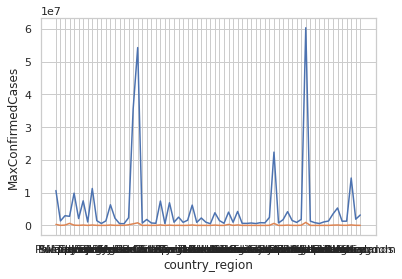

In [17]:
import matplotlib.pyplot
import seaborn

seaborn.set(style = "whitegrid")
pdf_group = df_group.toPandas()
pdf_group = pdf_group[pdf_group.country_region != 'Worldwide']
seaborn.lineplot(x="country_region", y="MaxConfirmedCases" , data = pdf_group)
seaborn.lineplot(x="country_region", y="MaxDeaths" , data = pdf_group)
matplotlib.pyplot.show()

In [22]:
df_france = df[df.country_region == 'France']

StatementMeta(SampleSpark, 1, 20, Finished, Available)

In [26]:
display(df_france)

StatementMeta(SampleSpark, 1, 24, Finished, Available)

SynapseWidget(Synapse.DataFrame, 4eb938b1-d861-476f-9f45-dda2c77fe412)

In [27]:
df_france

StatementMeta(SampleSpark, 1, 25, Finished, Available)

DataFrame[id: int, updated: date, confirmed: int, confirmed_change: int, deaths: int, deaths_change: smallint, recovered: int, recovered_change: int, latitude: double, longitude: double, iso2: string, iso3: string, country_region: string, admin_region_1: string, iso_subdivision: string, admin_region_2: string, load_time: timestamp]

StatementMeta(SampleSpark, 1, 41, Finished, Available)

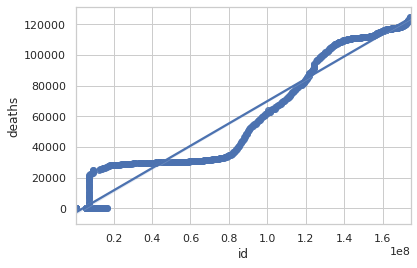

In [43]:
# Scatterplot with a nice regression line fit to it, all with just one call to Seaborn's regplot.

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pdf_france = df_france.toPandas()

x = pdf_france.iloc[:,0]
y = pdf_france.iloc[:,4]

sns.regplot(x=x, y=y)
plt.show()